In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import seaborn as sns
from rich import print
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

In [2]:
# Load the dataset
# data = pd.read_csv('data_org.csv') # Original dataset
data = pd.read_csv('data_a.csv') # Augmented dataset

# X = data.iloc[:, :-1]

# Select all columns except the last two for X
X = data.iloc[:, :-2]

# The last column is the target for classification problems
y = data.iloc[:, -1]

# Use SMOTE
print("Original class distribution:", Counter(y))
X, y = SMOTE(random_state=42).fit_resample(X, y)
X = np.array(X)
y = np.array(y)
print("After SMOTE class distribution:", Counter(y))

# Encode the categorical target variable
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.30, random_state=42, stratify=y_encoded)

# Normalize the features
# scaler = StandardScaler()
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape input to be 3D [samples, timesteps, features] for LSTM
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

dense = y_encoded.shape[1]

Original class distribution:
Counter({'unstable': 38280, 'stable': 21720})

After SMOTE class distribution:
Counter({'unstable': 38280, 'stable': 38280})

In [3]:
data.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,5.250000,5.250001,5.250001,5.250001,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742434,2.742437,2.742437,2.742437,0.752129,0.433017,0.433017,0.433017,0.274244,0.274243,0.274243,0.274243,0.036917
min,0.500793,0.500141,0.500141,0.500141,1.582590,-1.999945,-1.999945,-1.999945,0.050009,0.050028,0.050028,0.050028,-0.080760
25%,2.874892,2.875011,2.875011,2.875011,3.218300,-1.624997,-1.624997,-1.624997,0.287521,0.287497,0.287497,0.287497,-0.015557
50%,5.250004,5.249981,5.249981,5.249981,3.751025,-1.249996,-1.249996,-1.249996,0.525009,0.525007,0.525007,0.525007,0.017142
75%,7.624690,7.624896,7.624896,7.624896,4.282420,-0.874993,-0.874993,-0.874993,0.762435,0.762490,0.762490,0.762490,0.044878
max,9.999469,9.999837,9.999837,9.999837,5.864418,-0.500025,-0.500025,-0.500025,0.999937,0.999982,0.999982,0.999982,0.109403


In [4]:
#before SMOTE
data.stabf.value_counts()

stabf
unstable    38280
stable      21720
Name: count, dtype: int64

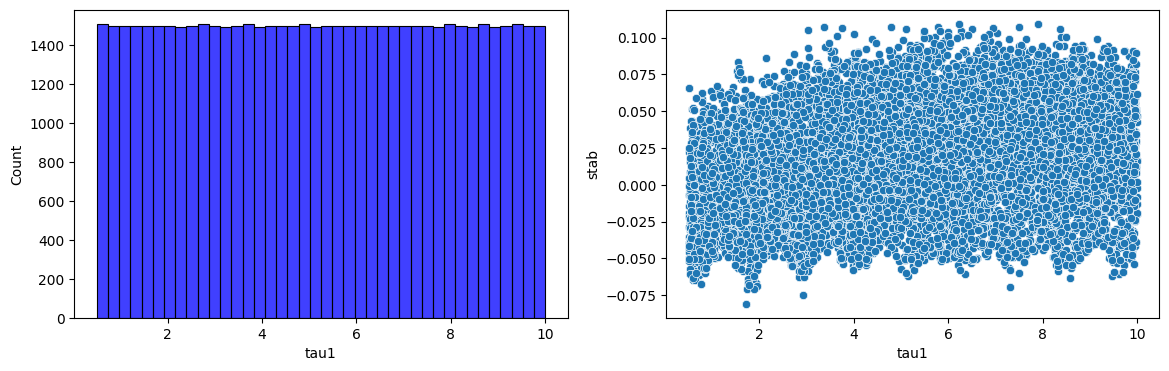

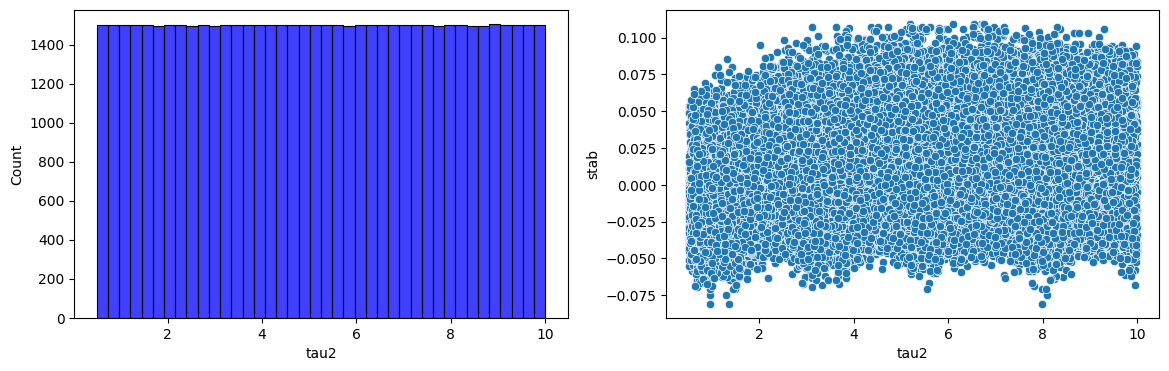

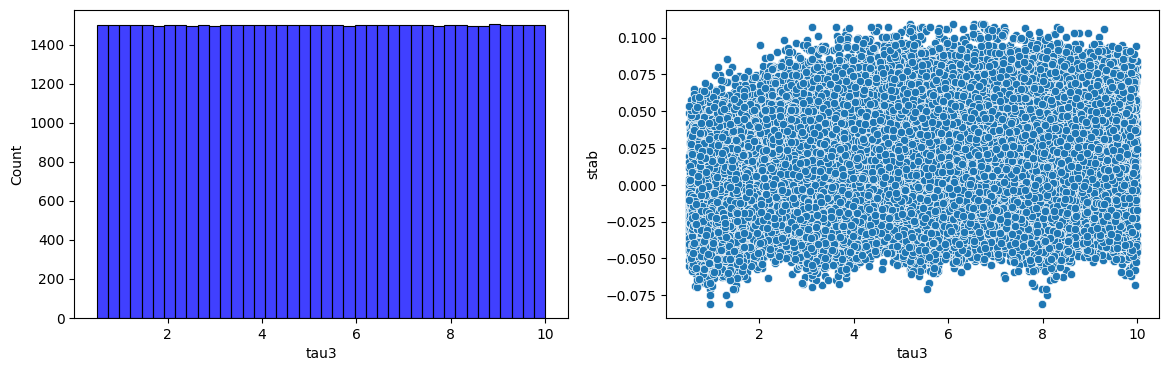

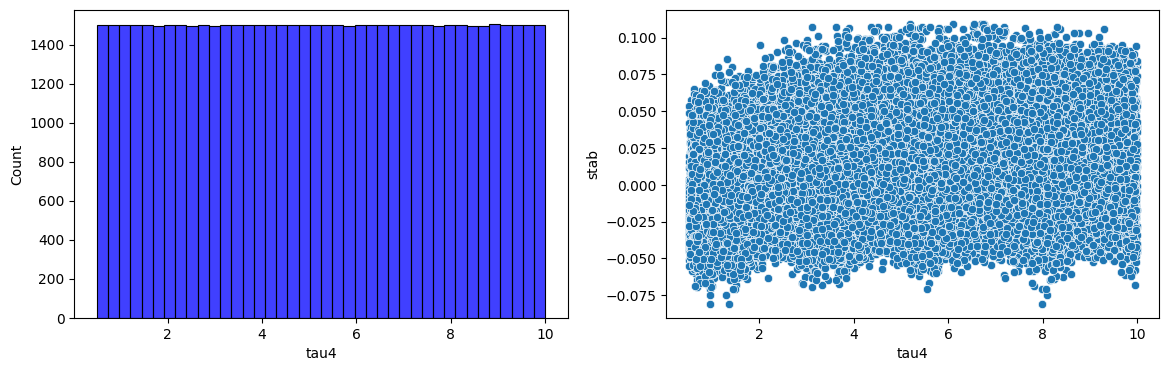

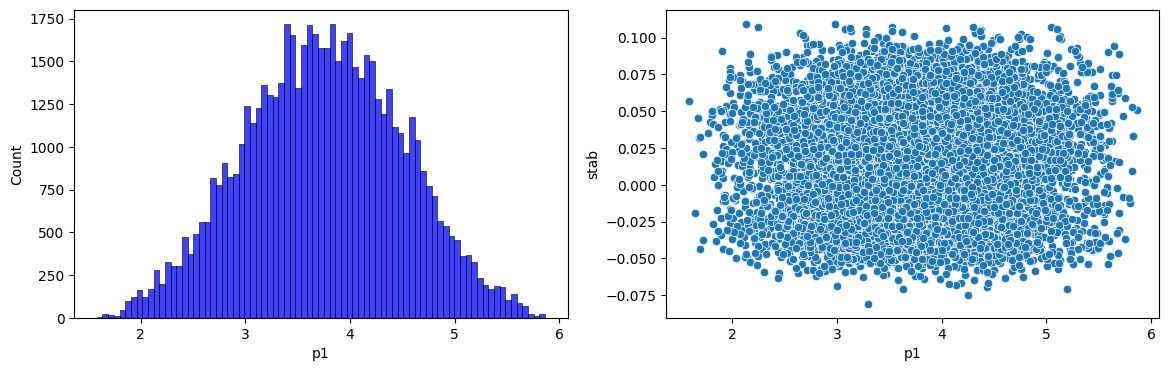

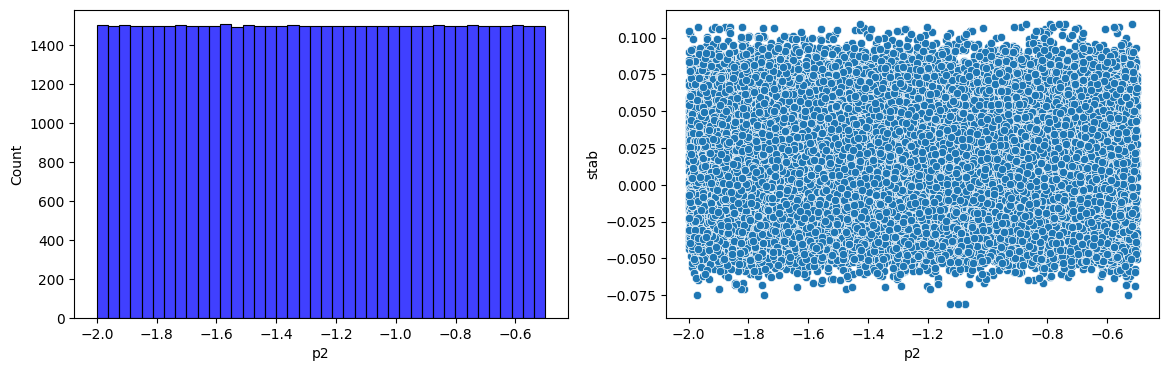

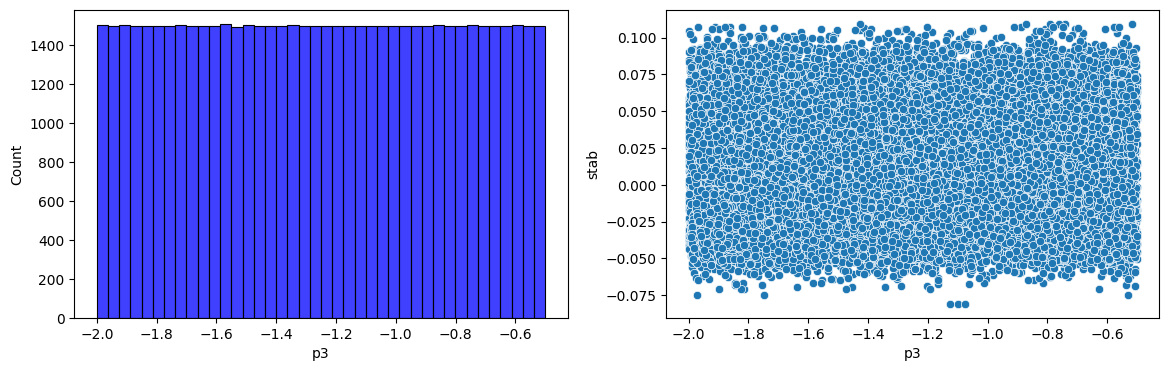

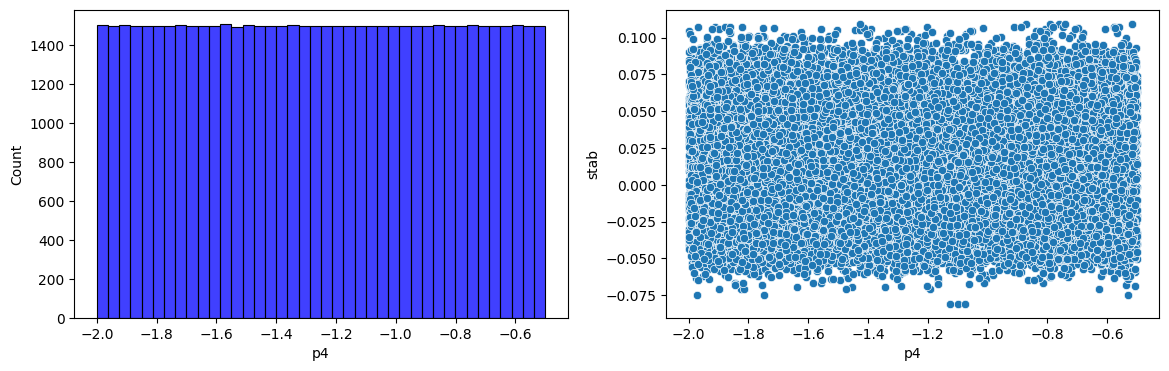

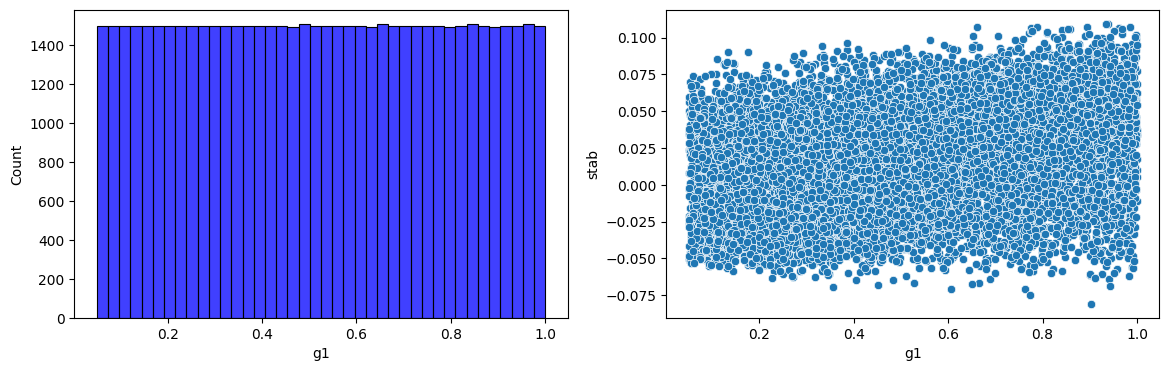

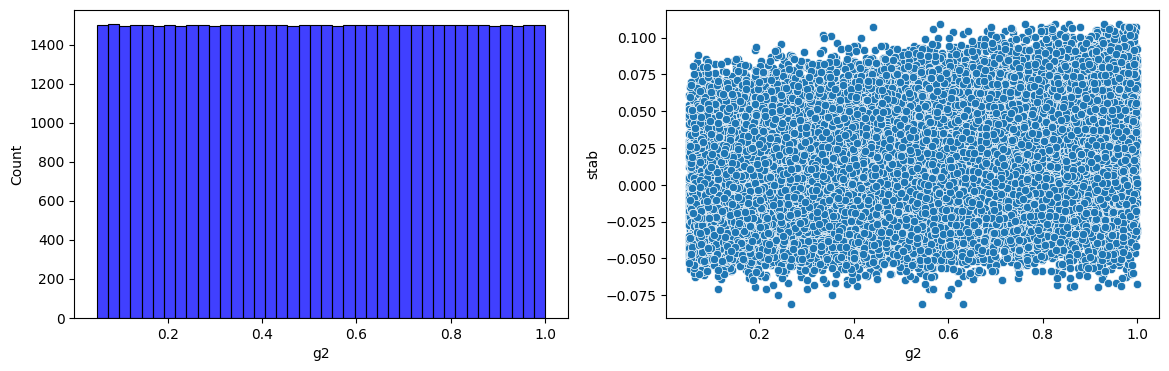

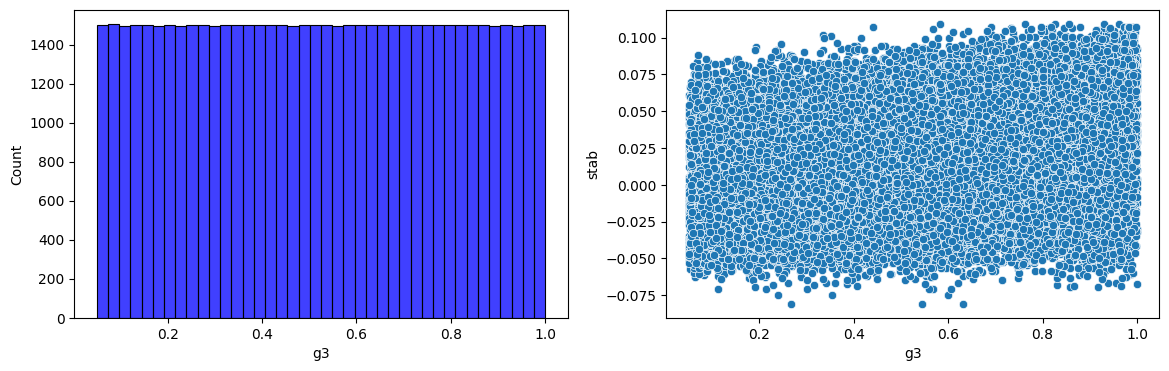

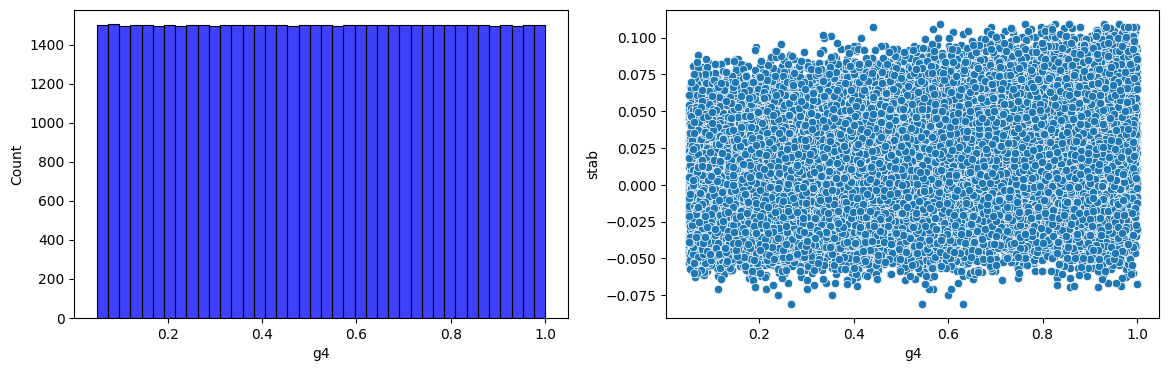

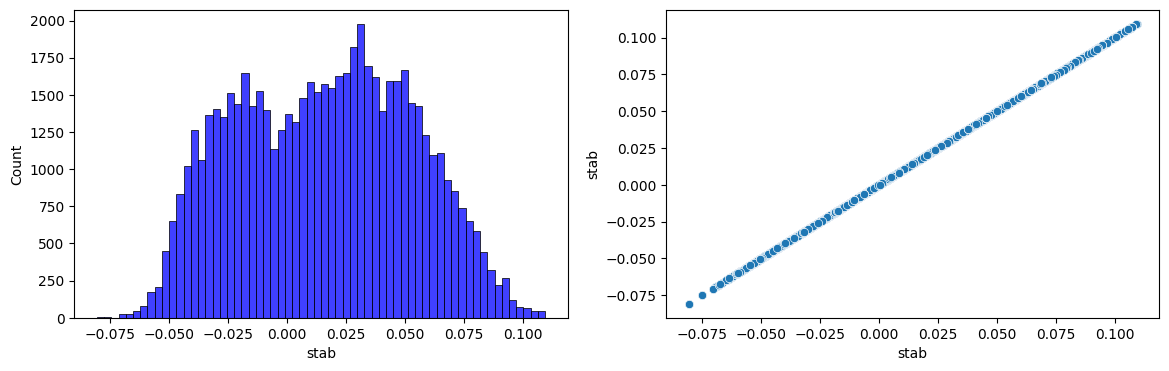

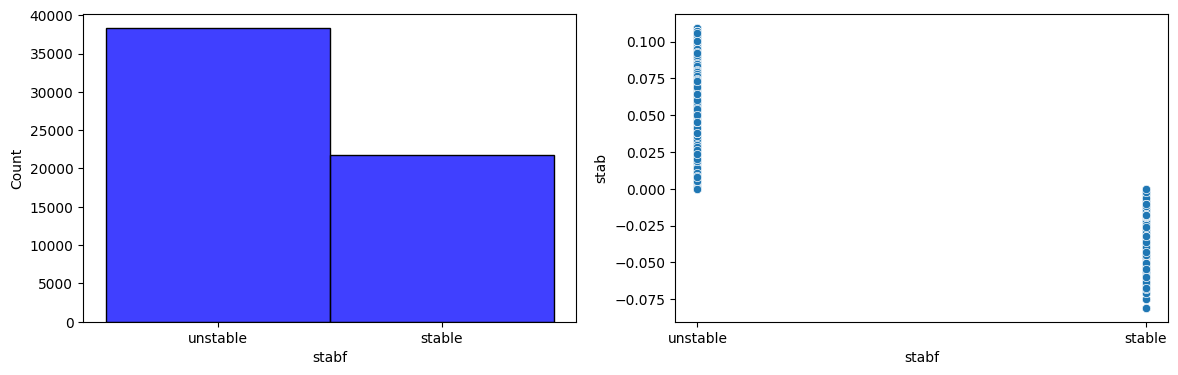

In [5]:
for column in data:
    plot_fig, plot_axes = plt.subplots(1, 2, figsize = (14, 4))
    # histogram of the values in the current column of the DataFrame
    charta_1 = sns.histplot(x=data[column], ax = plot_axes[0], color='b')

    # scatter plot with the current column values on the x-axis and values from the 'stab' column on the y-axis
    chart_2 = sns.scatterplot(x = column, y = 'stab', data = data, ax = plot_axes[1])

    plt.show()
del plot_fig, plot_axes

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
import plotly.io as pio

# Load the dataset
df = pd.read_csv('data_org.csv')
df['stabf'] = df['stabf'].replace({'unstable': 0, 'stable': 1})

# Prepare the features and the target variable
y = df['stabf'].values
X = df.drop(['stab', 'stabf'], axis=1).values

# Initialize and train the classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extract and sort the feature importances
importances = rf.feature_importances_
feature_names = df.drop(['stab', 'stabf'], axis=1).columns
features_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
features_df = features_df.sort_values('Importance', ascending=False) 

# Create a bar plot using Plotly
fig = px.bar(features_df, x='Importance', y='Feature', orientation='h',
             title='Random Forest Feature Importances',
             labels={'Importance': 'Importance Score', 'Feature': 'Feature'},
             color='Importance', 
             color_continuous_scale='blues')

# Enhance layout for better readability
fig.update_layout(
    title={'text': "Random Forest Feature Importances", 'x': 0.5, 'xanchor': 'center'},
    template='ggplot2',
    coloraxis_showscale=False,
    yaxis_title="Features",
    xaxis_title="Importance Score",
    yaxis={'categoryorder': 'total descending'},
    autosize=False,
    width=600,
    height=600,
    margin=dict(l=0, r=0, t=40, b=20)
)
fig.show()
pio.write_image(fig, 'fig_rf.pdf')

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load dataset
df = pd.read_csv('data_org.csv')
df['stabf'] = df['stabf'].replace({'unstable': 0, 'stable': 1})

# Prepare the features and target
y = df['stabf'].values
X = df.drop(['stab', 'stabf'], axis=1).values

# Apply t-SNE with specified parameters for better visualization
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, init='pca', random_state=42)
X_tsne = tsne.fit_transform(X)


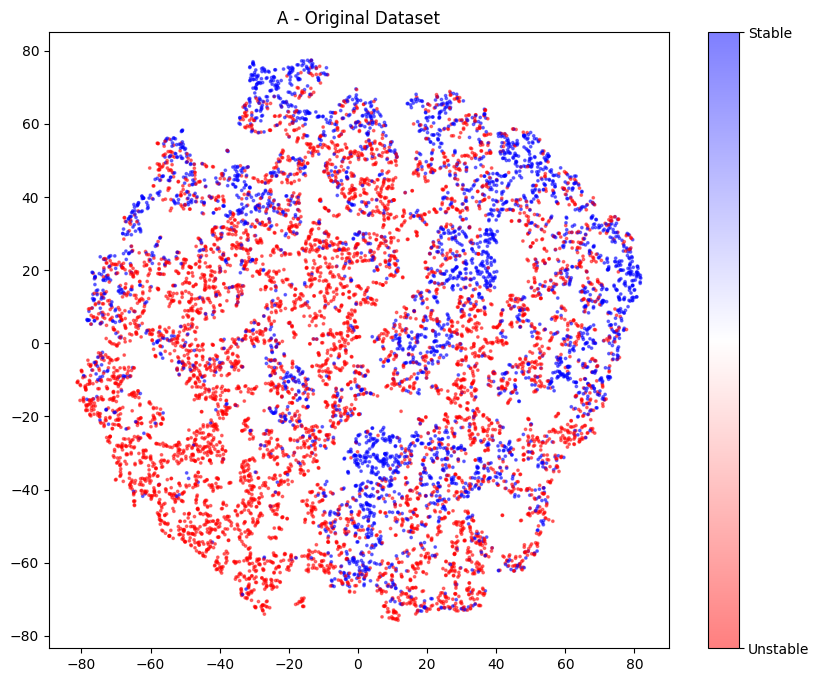

In [59]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='bwr_r', alpha=0.5, s=3)
colorbar = plt.colorbar(scatter, ticks=[0, 1])
colorbar.ax.set_yticklabels(['Unstable', 'Stable'])  # Set the labels such that 'Unstable' is at the bottom and 'Stable' at the top
plt.title('A - Original Dataset')
plt.savefig("fig_tsne_org.jpeg", bbox_inches='tight', dpi=100) 
plt.show()

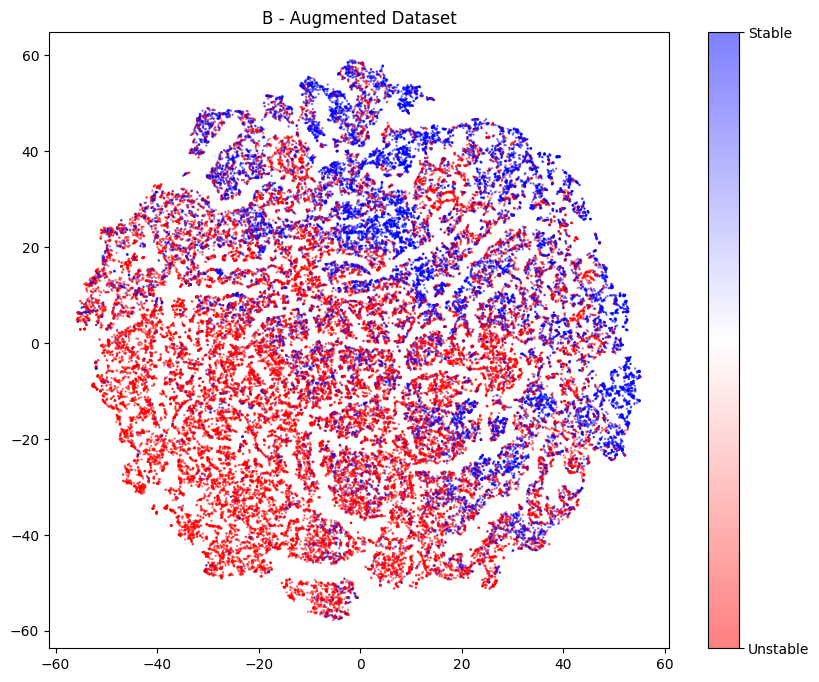

In [54]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='bwr_r', alpha=0.5, s=0.5)
colorbar = plt.colorbar(scatter, ticks=[0, 1])
colorbar.ax.set_yticklabels(['Unstable', 'Stable'])  # Set the labels such that 'Unstable' is at the bottom and 'Stable' at the top
plt.title('B - Augmented Dataset')
plt.savefig("fig_tsne_aug.jpeg", bbox_inches='tight', dpi=100) 
plt.show()